Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9090 - loss: 0.3008 - val_accuracy: 0.9840 - val_loss: 0.0503
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9853 - loss: 0.0477 - val_accuracy: 0.9867 - val_loss: 0.0374
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9901 - loss: 0.0301 - val_accuracy: 0.9878 - val_loss: 0.0355
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9935 - loss: 0.0210 - val_accuracy: 0.9892 - val_loss: 0.0323
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9942 - loss: 0.0165 - val_accuracy: 0.9898 - val_loss: 0.0288
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9871 - loss: 0.0358
Test accuracy: 0.9898


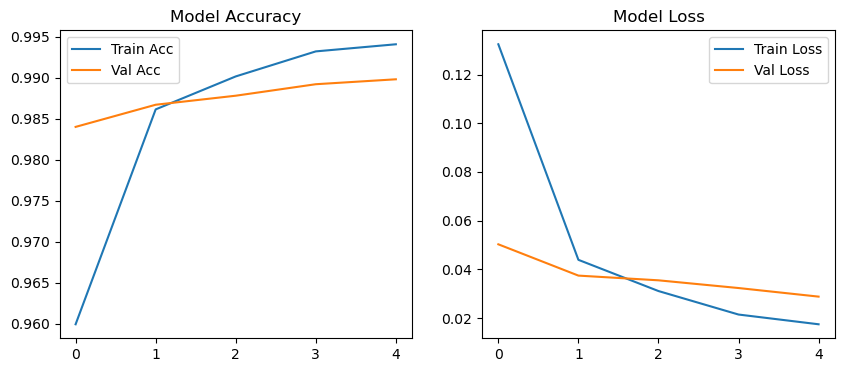

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset - no manual download needed
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape to add single-channel dimension (grayscale)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile with optimizer, loss function and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 5 epochs
history = model.fit(train_images, train_labels,
                    epochs=5,
                    validation_data=(test_images, test_labels))

# Evaluate model accuracy on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

# Plot accuracy and loss graphs (optional)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

# Save the model optionally
model.save("mnist_cnn_model.h5")
